## Import Libraries and Setup

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Setup 
start_pos = (10, 10)
goal_pos = (90, 80)

## The Bug 0 Algorithm Logic

In [20]:
def bug0_navigation(map_path, start, goal):
    # Load and preprocess the map
    img = Image.open(map_path).convert('L')
    grid = np.array(img)
    # Thresholding: 0 is obstacle, 255 is free
    binary_grid = (grid > 127).astype(np.uint8) * 255
    
    current = np.array(start, dtype=float)
    target = np.array(goal, dtype=float)
    path = [tuple(current)]
    
    mode = "GOAL_SEEK"
    step_size = 1.0
    max_iterations = 2000 
    
    # Directions for wall following (clockwise: N, NE, E, SE, S, SW, W, NW)
    directions = [(0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1), (-1, 0), (-1, -1)]



    for _ in range(max_iterations):
        if np.linalg.norm(current - target) < step_size:
            path.append(tuple(target))
            break
            
        if mode == "GOAL_SEEK":
            # Calculate unit vector toward goal
            heading = target - current
            unit_heading = heading / np.linalg.norm(heading)
            next_step = current + unit_heading * step_size
            
            # Check for obstacle
            if binary_grid[int(next_step[1]), int(next_step[0])] == 0:
                mode = "WALL_FOLLOW"
            else:
                current = next_step
                path.append(tuple(current))
                
        elif mode == "WALL_FOLLOW":
            # Simple Wall Following: Rotate around current point until we find free space
            # but check if the goal path is clear first
            heading_to_goal = target - current
            unit_goal = heading_to_goal / np.linalg.norm(heading_to_goal)
            goal_step = current + unit_goal * step_size
            
            # Transition Rule: If path to goal is clear, go back to Goal Seek
            if binary_grid[int(goal_step[1]), int(goal_step[0])] != 0:
                mode = "GOAL_SEEK"
                continue
            
            # Wall following logic (Right-hand rule approximation)
            # Find the first non-blocked direction
            found_move = False
            for dx, dy in directions:
                test_pos = current + np.array([dx, dy])
                if (0 <= test_pos[0] < grid.shape[1] and 
                    0 <= test_pos[1] < grid.shape[0] and
                    binary_grid[int(test_pos[1]), int(test_pos[0])] != 0):
                    current = test_pos
                    path.append(tuple(current))
                    found_move = True
                    break
            
            if not found_move: break # Trapped

    return np.array(path), binary_grid

## Result Visualization

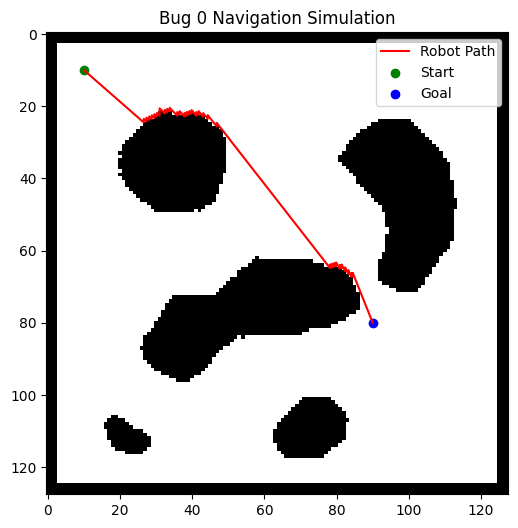

In [21]:
#Execution
path_coords, grid_data = bug0_navigation('map0.png', start_pos, goal_pos)

# Visualization
plt.figure(figsize=(6,6))
plt.imshow(grid_data, cmap='gray')
plt.plot(path_coords[:, 0], path_coords[:, 1], 'r-', label='Robot Path')
plt.scatter(*start_pos, c='g', label='Start')
plt.scatter(*goal_pos, c='b', label='Goal')
plt.legend()
plt.title("Bug 0 Navigation Simulation")
plt.show()